In [1]:
# from smarty.datasets import load_data, train_test_split
# import numpy as np

# ds = load_data(url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

In [2]:
from sklearn.datasets import load_breast_cancer
import numpy as np

ds = load_breast_cancer()

In [3]:
ds = np.c_[ds.data, ds.target.reshape(-1, 1)]

In [4]:
from smarty.datasets import DataSet, train_test_split

ds = DataSet().from_object(ds).batch(32).repeat(True)
ds.set_target_classes(-1)

train_ds, test_ds = train_test_split(ds)

/Users/user/Desktop/projects/ml/smarty/datasets/datasets.py:39: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  empty = np.where(col=='')[0]


In [5]:
from smarty.models.linear import LogisticRegression
from smarty.models.metrics import accuracy

lr = LogisticRegression(learning_rate=0.01, loss=accuracy)
lr.fit(train_ds, epochs=20)

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting training model for 20 epochs.
Epoch 1/20
	Step 15/15 - loss: 0.7142857142857143, 

Epoch 2/20
	Step 15/15 - loss: 0.42857142857142855, 

Epoch 3/20
	Step 15/15 - loss: 0.42857142857142855, 

Epoch 4/20
	Step 15/15 - loss: 0.8571428571428571, 

Epoch 5/20
	Step 15/15 - loss: 0.8571428571428571, 

Epoch 6/20
	Step 15/15 - loss: 0.8571428571428571, 

Epoch 7/20
	Step 15/15 - loss: 0.8571428571428571, 

Epoch 8/20
	Step 15/15 - loss: 0.42857142857142855, 

Epoch 9/20
	Step 15/15 - loss: 1.0, , , 

Epoch 10/20
	Step 15/15 - loss: 0.42857142857142855, 

Epoch 11/20
	Step 15/15 - loss: 0.42857142857142855, 

Epoch 12/20
	Step 15/15 - loss: 0.42857142857142855, 

Epoch 13/20
	Step 15/15 - loss: 0.42857142857142855, 

Epoch 14/20
	Step 15/15 - loss: 0.42857142857142855, 

Epoch 15/20
	Step 15/15 - loss: 0.8571428571428571, 

Epoch 16/20
	Step 15/15 - loss: 0.7142857142857143, 

Epoch 17/20
	Step 15/15 - loss: 0.42857142857142855, 

Epoch 18

/Users/user/Desktop/projects/ml/smarty/models/linear.py:58: RuntimeWarning: overflow encountered in exp
  return (1.0 / (1.0 + np.exp(-y_pred))).astype("i")


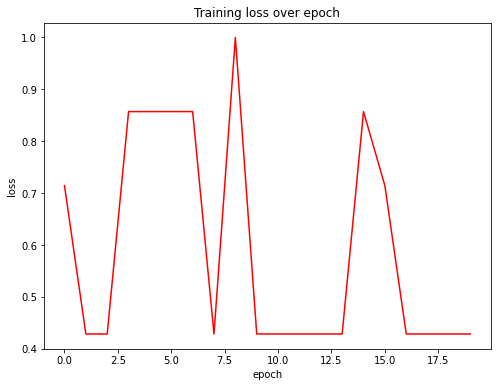

In [6]:
lr.plot_training()

In [9]:
lr.costs_

[0.7142857142857143,
 0.42857142857142855,
 0.42857142857142855,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.42857142857142855,
 1.0,
 0.42857142857142855,
 0.42857142857142855,
 0.42857142857142855,
 0.42857142857142855,
 0.42857142857142855,
 0.8571428571428571,
 0.7142857142857143,
 0.42857142857142855,
 0.42857142857142855,
 0.42857142857142855,
 0.42857142857142855]

In [8]:
lr.evaluate(ds)

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting making predictions.
Epoch 1/1
	Step 18/18

Loss: 0.7785588752196837.


In [10]:
y_pred = lr.predict(ds)

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting making predictions.
Epoch 1/1
	Step 18/18



/Users/user/Desktop/projects/ml/smarty/models/linear.py:58: RuntimeWarning: overflow encountered in exp
  return (1.0 / (1.0 + np.exp(-y_pred))).astype("i")


In [14]:
x = np.c_[ds.get_target_classes(), y_pred]

In [17]:
from smarty.models.dumb import evaluate_dumb
evaluate_dumb(ds, metric=accuracy)

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting training model for 1 epochs.
Epoch 1/1
	Step 1/1

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting making predictions.
Epoch 1/1
	Step 1/1



0.5614035087719298